In [145]:
import numpy as np
from numpy.linalg import norm, inv
import matplotlib.pyplot as plt

In [146]:
def f(x): # function to be minimized
    return (x[0]**6)/3 - 2.1*(x[0]**4) + 4*(x[1]**4) + x[0]*x[1] + 4*(x[0]**2 - x[1]**2)

def grad_f(x): # gradient of the function
    return np.array([2*(x[0]**5) - 8.4*(x[0]**3) + 8*x[0] + x[1],
                     16*(x[1]**3) + x[0] - 8*x[1]])
    
def hess_f(x): # hessian of the function
    return np.array([[10*(x[0]**4) - 25.2*(x[0]**2) + 8, 1],[1, 48*(x[1]**2) - 8]])

## Gradient Descent

In [147]:
x = [1, -1] # initial point
step_size = 0.1 # step size
epsilon = 1e-3 # tolerance
desc_df_list = []
desc_fx_list = []
desc_x_list = []
desc_df_list.append(norm(grad_f(x)))
desc_fx_list.append(f(x))
desc_x_list.append(x)
while norm(grad_f(x)) > epsilon:
    x = x - step_size*grad_f(x) # gradient descent
    desc_df_list.append(norm(grad_f(x)))
    desc_x_list.append(x)
    desc_fx_list.append(f(x))
desc_x_list = np.array(desc_x_list)
desc_df_list = np.array(desc_df_list)
desc_fx_list = np.array(desc_fx_list)
print("Minimum:", desc_fx_list[-1])
print("Minima:", desc_x_list[-1])

Minimum: -1.031628436869779
Minima: [ 0.08983688 -0.712701  ]


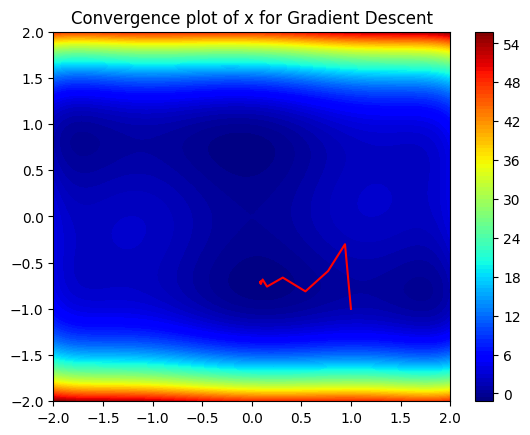

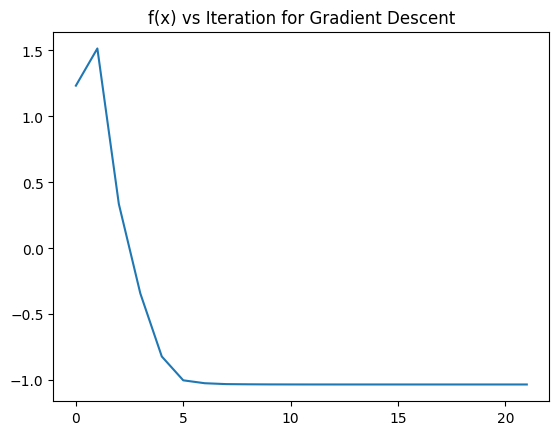

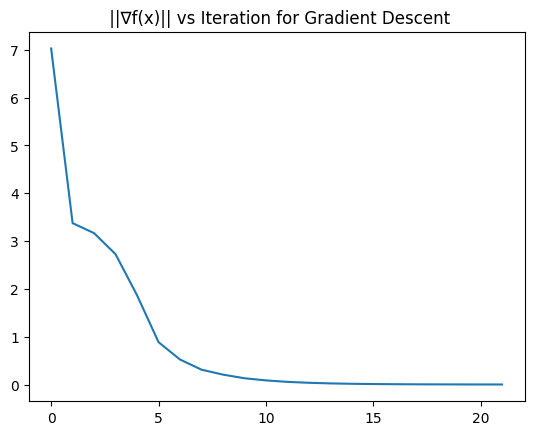

In [148]:
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100) 
X,Y = np.meshgrid(X,Y)

# Plots
plt.contourf(X,Y,f([X,Y]), 100, cmap='jet')
plt.colorbar()
plt.plot(desc_x_list[:,0], desc_x_list[:,1], 'r', label='Gradient Descent')
plt.title("Convergence plot of x for Gradient Descent")
plt.show()
plt.plot(desc_fx_list)
plt.title("f(x) vs Iteration for Gradient Descent")
plt.show()
plt.plot(desc_df_list)
plt.title(" ||∇f(x)|| vs Iteration for Gradient Descent")
plt.show()

## Newton's method

In [149]:
x = [1, -1] # initial point
epsilon = 1e-6 # tolerance
newton_df_list = []
newton_fx_list = []
newton_x_list = []
newton_df_list.append(norm(grad_f(x)))
newton_x_list.append(x)
newton_fx_list.append(f(x))

In [150]:
while norm(grad_f(x)) > epsilon:
    x = x - inv(hess_f(x))@grad_f(x) # newton's method
    newton_df_list.append(norm(grad_f(x)))
    newton_x_list.append(x)
    newton_fx_list.append(f(x))
newton_fx_list = np.array(newton_fx_list)
newton_df_list = np.array(newton_df_list)
newton_x_list = np.array(newton_x_list)
print("Minimum:", newton_fx_list[-1])
print("Minima:", newton_x_list[-1])


Minimum: 0.5437186009781847
Minima: [ 1.10920534 -0.7682681 ]


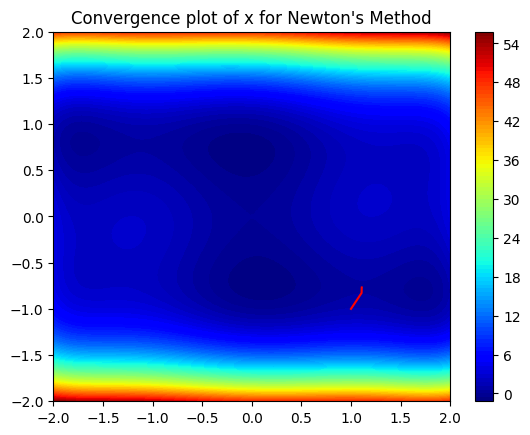

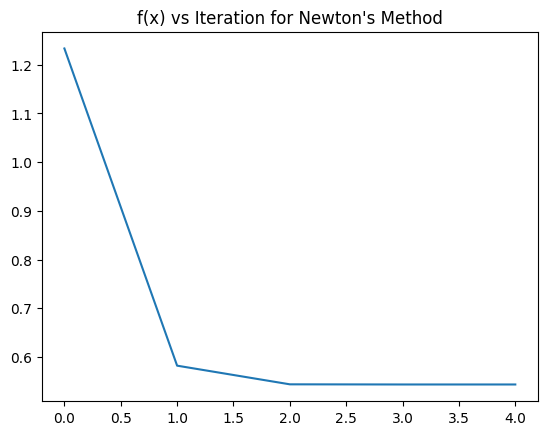

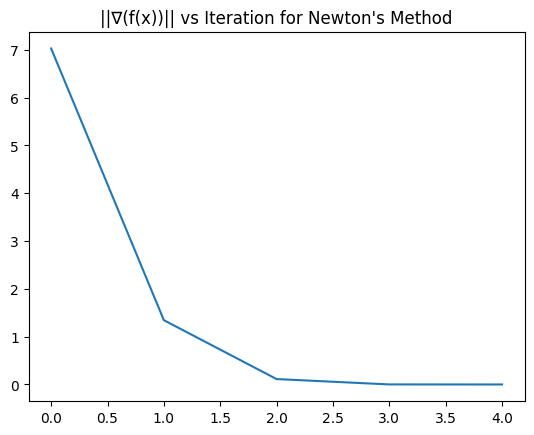

In [151]:
# Plots
plt.contourf(X,Y,f([X,Y]), 100, cmap='jet')
plt.colorbar()
plt.plot(newton_x_list[:,0], newton_x_list[:,1], 'r', label='Newton')
plt.title("Convergence plot of x for Newton's Method")
plt.show()
plt.plot(newton_fx_list)
plt.title("f(x) vs Iteration for Newton's Method")
plt.show()
plt.plot(newton_df_list)
plt.title("||∇(f(x))|| vs Iteration for Newton's Method")
plt.show()

## Gradient Descent vs Newton's method

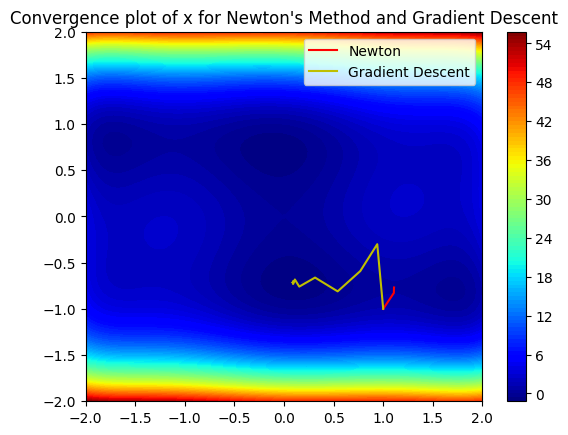

In [152]:


plt.contourf(X,Y,f([X,Y]), 100, cmap='jet')
plt.colorbar()
plt.plot(newton_x_list[:,0], newton_x_list[:,1], 'r', label='Newton')
plt.plot(desc_x_list[:,0], desc_x_list[:,1], 'y', label='Gradient Descent')
plt.legend()
plt.title("Convergence plot of x for Newton's Method and Gradient Descent")
plt.show()